In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
hartree2kcal=627.5094740631

In [2]:
df=pd.read_pickle("minima_5z")
pcxdf=pd.read_pickle("pcX23")

In [3]:
pcxdf

,BF@COe,BF@COm,BFe,BFm,CO@BFe,CO@BFm,CO@NNe,CO@NNm,COe,COm,NN@COe,NN@COm,NNe,NNm,basis set,nAO,energy_MAE,rad_MAE,eMAE_corr
0,-124.156580,2.35483,-124.162432,2.35348,-112.785317,2.08324,-112.781076,2.08391,-112.786616,2.08272,-108.989017,2.01382,-108.989064,2.01389,pcX-2,90,0.003184,0.000783,0.001749
1,-124.168734,2.35201,-124.168895,2.35193,-112.792393,2.08230,-112.792287,2.08224,-112.792491,2.08218,-108.996335,2.01342,-108.996354,2.01335,pcX-3,168,0.000120,0.000083,0.000060


In [4]:
df.sort_values("nAO",inplace=True)
df

,BF@COe,BF@COm,BFe,BFm,CO@BFe,CO@BFm,CO@NNe,CO@NNm,COe,COm,NN@COe,NN@COm,NNe,NNm,basis set,energy_MAE,nAO,rad_MAE
4,-123.652305,2.13820,-124.156060,2.35927,-112.277758,1.97963,-112.313178,1.95836,-112.781813,2.08712,-108.506044,1.93577,-108.986557,2.01655,cc-pVTZ,0.489239,60,0.134525
3,-124.065701,2.34229,-124.162442,2.36062,-112.681261,2.09133,-112.693567,2.07844,-112.787152,2.08435,-108.898157,2.01042,-108.991419,2.01456,def2-TZVP,0.097370,62,0.008840
6,-124.134118,2.35566,-124.156825,2.35696,-112.761016,2.09039,-112.761980,2.08355,-112.782879,2.08512,-108.967949,2.01677,-108.987698,2.01451,cc-pCVTZ,0.021305,86,0.002600
8,-124.153530,2.35567,-124.159289,2.35726,-112.778327,2.09205,-112.780823,2.08386,-112.785235,2.08499,-108.985306,2.01728,-108.990408,2.01436,ccpcvTQZmix,0.005545,90,0.003175
5,-124.148394,2.35147,-124.166292,2.35324,-112.755719,2.08031,-112.770599,2.08115,-112.790626,2.08246,-108.970897,2.01162,-108.994470,2.01366,cc-pVQZ,0.024101,110,0.001817
2,-124.154123,2.35008,-124.168406,2.35281,-112.784762,2.08562,-112.781751,2.08307,-112.792055,2.08231,-108.988121,2.01540,-108.995734,2.01340,def2-QZVPP,0.009873,114,0.002200
1,-124.161934,2.35195,-124.168016,2.35167,-112.781655,2.08292,-112.786205,2.08165,-112.791694,2.08206,-108.988587,2.01329,-108.995599,2.01325,pC3,0.007155,128,0.000397
7,-124.164032,2.35364,-124.166507,2.35268,-112.789480,2.08272,-112.788615,2.08294,-112.790888,2.08223,-108.993876,2.01332,-108.994710,2.01356,cc-pVCQZ,0.001747,168,0.000600
0,-124.160390,2.35174,-124.168781,2.35211,-112.779840,2.08053,-112.783413,2.08171,-112.792412,2.08215,-108.986424,2.01236,-108.996188,2.01333,cc-pV5Z,NaN,182,NaN
0,-124.168697,2.35186,-124.169042,2.35190,-112.791840,2.08208,-112.792254,2.08209,-112.792615,2.08207,-108.996019,2.01331,-108.996523,2.01327,pC4,0.000496,218,0.000027


In [5]:
df['energy_MAE']=(df['BF@COe']+df['CO@BFe']+df['CO@NNe']+df['NN@COe']-2*df['COe']-df['NNe']-df['BFe'])/4
df['rad_MAE']=(abs(df['BF@COm']-df['BFm'])+abs(df['CO@BFm']-df['COm'])+
               abs(df['CO@NNm']-df['COm'])+abs(df['NN@COm']-df['NNm']))/4

In [6]:
pcxdf['energy_MAE']=(pcxdf['BF@COe']+pcxdf['CO@BFe']+pcxdf['CO@NNe']+pcxdf['NN@COe']-
                     2*pcxdf['COe']-pcxdf['NNe']-pcxdf['BFe'])/4
pcxdf['rad_MAE']=(abs(pcxdf['BF@COm']-pcxdf['BFm'])+abs(pcxdf['CO@BFm']-pcxdf['COm'])+
               abs(pcxdf['CO@NNm']-pcxdf['COm'])+abs(pcxdf['NN@COm']-pcxdf['NNm']))/4
#pcxdf.to_pickle("pcX23")

In [7]:
#df.to_pickle("minima_5z")

In [8]:
alchs=["BF@CO","CO@BF","CO@NN","NN@CO"]


In [9]:
eMAE=np.log10(np.asarray(df.energy_MAE))
naoArr=np.asarray(df.nAO)

In [10]:
df

,BF@COe,BF@COm,BFe,BFm,CO@BFe,CO@BFm,CO@NNe,CO@NNm,COe,COm,NN@COe,NN@COm,NNe,NNm,basis set,energy_MAE,nAO,rad_MAE
4,-123.652305,2.13820,-124.156060,2.35927,-112.277758,1.97963,-112.313178,1.95836,-112.781813,2.08712,-108.506044,1.93577,-108.986557,2.01655,cc-pVTZ,0.489239,60,0.134525
3,-124.065701,2.34229,-124.162442,2.36062,-112.681261,2.09133,-112.693567,2.07844,-112.787152,2.08435,-108.898157,2.01042,-108.991419,2.01456,def2-TZVP,0.097370,62,0.008840
6,-124.134118,2.35566,-124.156825,2.35696,-112.761016,2.09039,-112.761980,2.08355,-112.782879,2.08512,-108.967949,2.01677,-108.987698,2.01451,cc-pCVTZ,0.021305,86,0.002600
8,-124.153530,2.35567,-124.159289,2.35726,-112.778327,2.09205,-112.780823,2.08386,-112.785235,2.08499,-108.985306,2.01728,-108.990408,2.01436,ccpcvTQZmix,0.005545,90,0.003175
5,-124.148394,2.35147,-124.166292,2.35324,-112.755719,2.08031,-112.770599,2.08115,-112.790626,2.08246,-108.970897,2.01162,-108.994470,2.01366,cc-pVQZ,0.024101,110,0.001817
2,-124.154123,2.35008,-124.168406,2.35281,-112.784762,2.08562,-112.781751,2.08307,-112.792055,2.08231,-108.988121,2.01540,-108.995734,2.01340,def2-QZVPP,0.009873,114,0.002200
1,-124.161934,2.35195,-124.168016,2.35167,-112.781655,2.08292,-112.786205,2.08165,-112.791694,2.08206,-108.988587,2.01329,-108.995599,2.01325,pC3,0.007155,128,0.000397
7,-124.164032,2.35364,-124.166507,2.35268,-112.789480,2.08272,-112.788615,2.08294,-112.790888,2.08223,-108.993876,2.01332,-108.994710,2.01356,cc-pVCQZ,0.001747,168,0.000600
0,-124.160390,2.35174,-124.168781,2.35211,-112.779840,2.08053,-112.783413,2.08171,-112.792412,2.08215,-108.986424,2.01236,-108.996188,2.01333,cc-pV5Z,0.009931,182,0.000850
0,-124.168697,2.35186,-124.169042,2.35190,-112.791840,2.08208,-112.792254,2.08209,-112.792615,2.08207,-108.996019,2.01331,-108.996523,2.01327,pC4,0.000496,218,0.000027


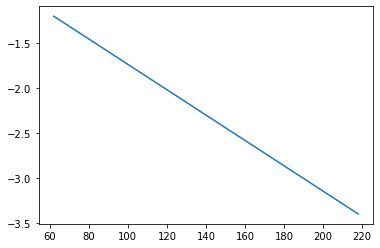

In [11]:
# for the interpolation line
x=np.asarray(df.nAO)[1:3].tolist()
[x.append(i) for i in np.asarray(df.nAO)[5:8].tolist()]
x.append(np.asarray(df.nAO)[9])
y=eMAE[1:3].tolist()
[y.append(i) for i in eMAE[5:8].tolist()]
y.append(eMAE[9])
m, b = np.polyfit(x, y, 1)
x=np.asarray(x)
plt.plot(x, m*x + b)

In [12]:
df

,BF@COe,BF@COm,BFe,BFm,CO@BFe,CO@BFm,CO@NNe,CO@NNm,COe,COm,NN@COe,NN@COm,NNe,NNm,basis set,energy_MAE,nAO,rad_MAE
4,-123.652305,2.13820,-124.156060,2.35927,-112.277758,1.97963,-112.313178,1.95836,-112.781813,2.08712,-108.506044,1.93577,-108.986557,2.01655,cc-pVTZ,0.489239,60,0.134525
3,-124.065701,2.34229,-124.162442,2.36062,-112.681261,2.09133,-112.693567,2.07844,-112.787152,2.08435,-108.898157,2.01042,-108.991419,2.01456,def2-TZVP,0.097370,62,0.008840
6,-124.134118,2.35566,-124.156825,2.35696,-112.761016,2.09039,-112.761980,2.08355,-112.782879,2.08512,-108.967949,2.01677,-108.987698,2.01451,cc-pCVTZ,0.021305,86,0.002600
8,-124.153530,2.35567,-124.159289,2.35726,-112.778327,2.09205,-112.780823,2.08386,-112.785235,2.08499,-108.985306,2.01728,-108.990408,2.01436,ccpcvTQZmix,0.005545,90,0.003175
5,-124.148394,2.35147,-124.166292,2.35324,-112.755719,2.08031,-112.770599,2.08115,-112.790626,2.08246,-108.970897,2.01162,-108.994470,2.01366,cc-pVQZ,0.024101,110,0.001817
2,-124.154123,2.35008,-124.168406,2.35281,-112.784762,2.08562,-112.781751,2.08307,-112.792055,2.08231,-108.988121,2.01540,-108.995734,2.01340,def2-QZVPP,0.009873,114,0.002200
1,-124.161934,2.35195,-124.168016,2.35167,-112.781655,2.08292,-112.786205,2.08165,-112.791694,2.08206,-108.988587,2.01329,-108.995599,2.01325,pC3,0.007155,128,0.000397
7,-124.164032,2.35364,-124.166507,2.35268,-112.789480,2.08272,-112.788615,2.08294,-112.790888,2.08223,-108.993876,2.01332,-108.994710,2.01356,cc-pVCQZ,0.001747,168,0.000600
0,-124.160390,2.35174,-124.168781,2.35211,-112.779840,2.08053,-112.783413,2.08171,-112.792412,2.08215,-108.986424,2.01236,-108.996188,2.01333,cc-pV5Z,0.009931,182,0.000850
0,-124.168697,2.35186,-124.169042,2.35190,-112.791840,2.08208,-112.792254,2.08209,-112.792615,2.08207,-108.996019,2.01331,-108.996523,2.01327,pC4,0.000496,218,0.000027


In [13]:
eMAE=np.asarray(df.energy_MAE)*1000

(0.07951099620290424, 741.2324655803562)


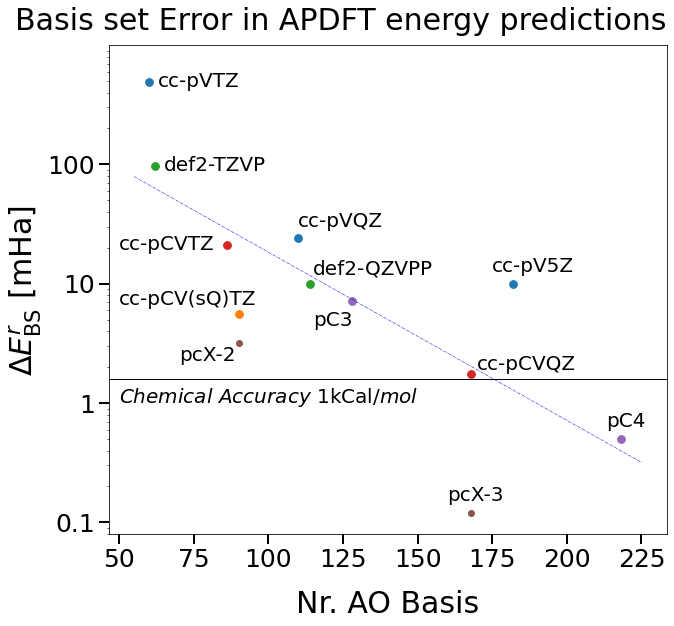

In [14]:
fig=plt.figure(figsize=(10,9))
plt.yscale("log")
plt.title("Basis set Error in APDFT energy predictions", fontsize=30,pad=15,loc="right")
msz=60
plt.scatter([naoArr[i] for i in [0,4,8]],[eMAE[i] for i in [0,4,8]],marker='o',s=msz,label="cc-pVnZ")
plt.scatter(naoArr[3],eMAE[3],marker='o',s=msz,label="cc-pCV(sQ)TZ")
plt.scatter([naoArr[i] for i in [1,5]],[eMAE[i] for i in [1,5]],marker='o',s=msz,label="def2-nZVP")
plt.scatter([naoArr[i] for i in [2,7]],[eMAE[i] for i in [2,7]],marker='o',s=msz,label="cc-pCVnZ")
plt.scatter([naoArr[i] for i in [6,9]],[eMAE[i] for i in [6,9]],marker='o',s=msz,label="pC-n")
plt.scatter(pcxdf.nAO,np.asarray(pcxdf.energy_MAE)*1000,label="pcX-n")

plt.axhline(1000/hartree2kcal,lw=1,color="black")
plt.plot(np.asarray([55,225]), 10**(m*np.asarray([55,225]) + b+3),lw=.5,color="blue",ls='-.')

#texts
tfs=20
plt.text(63,10**(-.35+3),"cc-pVTZ",fontsize=tfs)
plt.text(65,10**(-1.05+3),"def2-TZVP",fontsize=tfs)
plt.text(50,10**(-1.72+3),"cc-pCVTZ",fontsize=tfs)
plt.text(50,10**(-2.18+3),"cc-pCV(sQ)TZ",fontsize=tfs)
plt.text(70,10**(-2.65+3),"pcX-2",fontsize=tfs)
plt.text(110,10**(-1.52+3),"cc-pVQZ",fontsize=tfs)
plt.text(115,10**(-1.92+3),"def2-QZVPP",fontsize=tfs)
plt.text(115,10**(-2.35+3),"pC3",fontsize=tfs)
plt.text(170,10**(-2.72+3),"cc-pCVQZ",fontsize=tfs)
plt.text(160,10**(-3.82+3),"pcX-3",fontsize=tfs)
plt.text(175,10**(-1.9+3),"cc-pV5Z",fontsize=tfs)
plt.text(213,10**(-3.2+3),"pC4",fontsize=tfs)

plt.text(50,10**(-.0),"$Chemical \ Accuracy$ 1kCal/$mol$",fontsize=tfs,color="black")

#plt.legend(fontsize=22,ncol=2,loc="upper right")
plt.xlabel("Nr. AO Basis",size=30,labelpad=18)
plt.ylabel("$\Delta E_{\mathrm{BS}}^r$ [mHa] ",size=30)

plt.tick_params(length=10,width=2.)
plt.xticks(size=25)
plt.yticks([0.1,1,10,100 ],labels=["0.1","1","10","100" ],size=25)
print(plt.ylim())
plt.ylim(plt.ylim()[0],1000)
plt.savefig("scatter_ee.png",bbox_inches="tight")

In [15]:
rMAE=np.asarray(df.rad_MAE)

(1.798287719457726e-05, 0.20572000019607142)


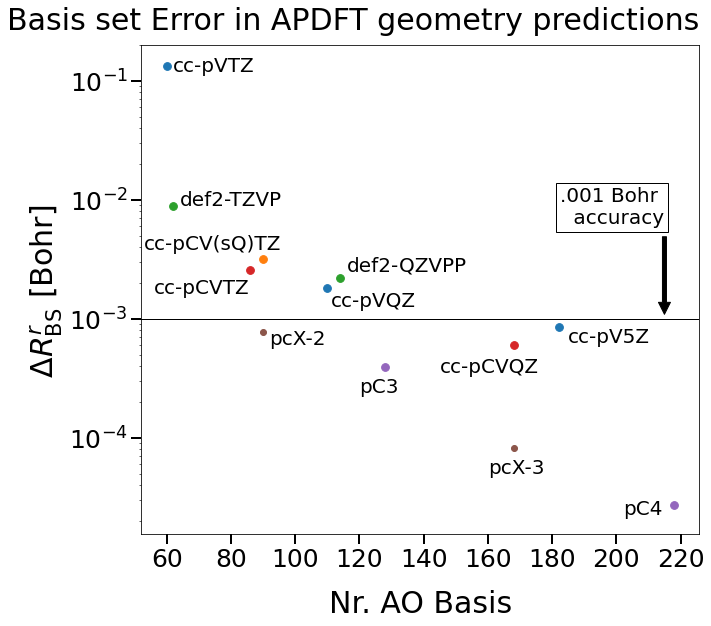

In [16]:
fig=plt.figure(figsize=(10,9))
plt.yscale("log")
plt.title("Basis set Error in APDFT geometry predictions", fontsize=30,pad=15,loc="right")
msz=60
plt.scatter([naoArr[i] for i in [0,4,8]],[rMAE[i] for i in [0,4,8]],marker='o',s=msz,label="cc-pVnZ")
plt.scatter(naoArr[3],rMAE[3],marker='o',s=msz,label="cc-pCV(sQ)TZ")
plt.scatter([naoArr[i] for i in [1,5]],[rMAE[i] for i in [1,5]],marker='o',s=msz,label="def2-nZVP")
plt.scatter([naoArr[i] for i in [2,7]],[rMAE[i] for i in [2,7]],marker='o',s=msz,label="cc-pCVnZ")
plt.scatter([naoArr[i] for i in [6,9]],[rMAE[i] for i in [6,9]],marker='o',s=msz,label="pC-n")
plt.scatter(pcxdf.nAO,np.asarray(pcxdf.rad_MAE),label="pcX-n")



plt.ylabel(" $\Delta R_\mathrm{BS}^r$ [Bohr]  ",size=30)
plt.xlabel("Nr. AO Basis",size=30,labelpad=18)
#plt.legend(fontsize=22,ncol=2)
plt.axhline(10**-3,color="black",lw=1)

#texts
tfs=20
plt.text(62,10**-.92,"cc-pVTZ",fontsize=tfs)
plt.text(64,10**-2.05,"def2-TZVP",fontsize=tfs)
plt.text(56,10**-2.79,"cc-pCVTZ",fontsize=tfs)
plt.text(53,10**-2.42,"cc-pCV(sQ)TZ",fontsize=tfs)
plt.text(92,10**-3.22,"pcX-2",fontsize=tfs)
plt.text(111,10**-2.9,"cc-pVQZ",fontsize=tfs)
plt.text(116,10**-2.6,"def2-QZVPP",fontsize=tfs)
plt.text(120,10**-3.62,"pC3",fontsize=tfs)
plt.text(145,10**-3.45,"cc-pCVQZ",fontsize=tfs)
plt.text(160,10**-4.3,"pcX-3",fontsize=tfs)
plt.text(185,10**-3.2,"cc-pV5Z",fontsize=tfs)
plt.text(202,10**-4.65,"pC4",fontsize=tfs)

plt.annotate(".001 Bohr \n accuracy",xy=(215,10**-3.0), xytext=(215, 10**-2.2), ha="right",
             arrowprops=dict(facecolor='black', shrink=0.05),fontsize=tfs,bbox={'facecolor':"white"})
#plt.text(55,10**-3.8,"10$^{-3}$ Bohr \n accuracy",fontsize=tfs)

print(plt.ylim())
plt.ylim(1.5484492133432385e-05,0.2)

plt.tick_params(length=10,width=2.)
plt.xticks(size=25)
plt.yticks(size=25)

plt.savefig("scatter_BLe.png",bbox_inches="tight")

In [17]:
[1,2]+[3,2]

[1, 2, 3, 2]

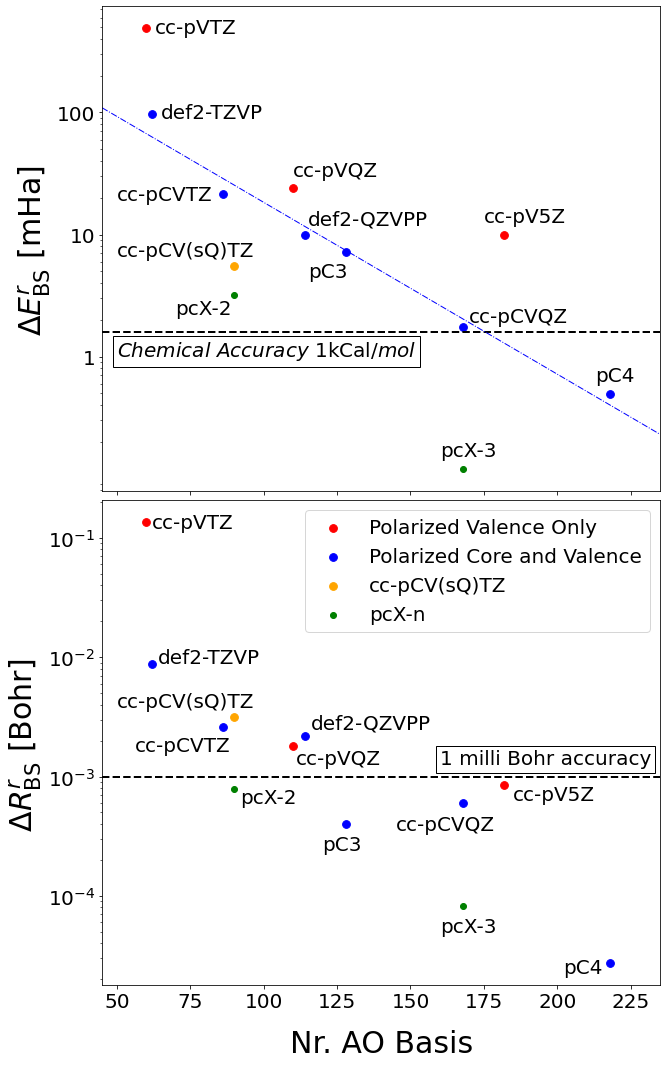

In [19]:
fig=plt.figure(figsize=(10,18))
axs=fig.subplots(2,1,sharex=True,gridspec_kw={"hspace":.02})
ax0,ax1=axs[0],axs[1]

ax0.semilogy()
#ax0.set_title("Relaxed APDFT Basis set Error", fontsize=30,pad=15,loc="center")
ax0.set_ylabel("$\Delta E_{\mathrm{BS}}^r$ [mHa] ",size=30)


msz=60
ax0.scatter([naoArr[i] for i in [0,4,8]],[eMAE[i] for i in [0,4,8]],marker='o',s=msz,color="red",label="cc-pVnZ")
ax0.scatter(naoArr[3],eMAE[3],marker='o',s=msz,color="orange",label="cc-pCV(sQ)TZ")
#ax0.scatter([naoArr[i] for i in [1,5]],[eMAE[i] for i in [1,5]],marker='o',s=msz,color="blue",label="def2-nZVP")
#ax0.scatter([naoArr[i] for i in [2,7]],[eMAE[i] for i in [2,7]],marker='o',s=msz,color="blue",label="cc-pCVnZ")
#ax0.scatter([naoArr[i] for i in [6,9]],[eMAE[i] for i in [6,9]],marker='o',s=msz,color="blue",label="pC-n")

ax0.scatter([naoArr[i] for i in [1,5]]+[naoArr[i] for i in [2,7,6,9]],
            [eMAE[i] for i in [1,5]]+[eMAE[i] for i in [2,7,6,9]],marker='o',s=msz,color="blue",label="Polarized Core and Valence")

ax0.scatter(pcxdf.nAO,np.asarray(pcxdf.energy_MAE)*1000,color="green",label="pcX-n")

ax0.axhline(1000/hartree2kcal,lw=2,color="black",ls="--")
#print(dir(ax0))
ax0.plot(np.asarray([45,240]), 10**(m*np.asarray([45,240]) + b+3),lw=1,color="blue",ls='-.')
ax0.set_xlim(45,235)
#texts
tfs=20
ax0.text(63,10**(-.35+3),"cc-pVTZ",fontsize=tfs)
ax0.text(65,10**(-1.05+3),"def2-TZVP",fontsize=tfs)
ax0.text(50,10**(-1.72+3),"cc-pCVTZ",fontsize=tfs)
ax0.text(50,10**(-2.18+3),"cc-pCV(sQ)TZ",fontsize=tfs)
ax0.text(70,10**(-2.65+3),"pcX-2",fontsize=tfs)
ax0.text(110,10**(-1.52+3),"cc-pVQZ",fontsize=tfs)
ax0.text(115,10**(-1.92+3),"def2-QZVPP",fontsize=tfs)
ax0.text(115,10**(-2.35+3),"pC3",fontsize=tfs)
ax0.text(170,10**(-2.72+3),"cc-pCVQZ",fontsize=tfs)
ax0.text(160,10**(-3.82+3),"pcX-3",fontsize=tfs)
ax0.text(175,10**(-1.9+3),"cc-pV5Z",fontsize=tfs)
ax0.text(213,10**(-3.2+3),"pC4",fontsize=tfs)

ax0.set_yticks([1,10,100])
ax0.set_yticklabels(["1","10","100"],size=tfs)

ax0.text(50,10**(-.0),"$Chemical \ Accuracy$ 1kCal/$mol$",fontsize=tfs,color="black",bbox={'facecolor':"white"})


#################-------AX 1-------###########
ax1.semilogy()

msz=60
ax1.scatter([naoArr[i] for i in [0,4,8]],[rMAE[i] for i in [0,4,8]],marker='o',color="red",s=msz,label="Polarized Valence Only")
ax1.scatter([naoArr[i] for i in [1,5,2,7,6,9]],[rMAE[i] for i in [1,5,2,7,6,9]],marker='o',color="blue",s=msz,\
            label="Polarized Core and Valence")

#ax1.scatter([naoArr[i] for i in [1,5]],[rMAE[i] for i in [1,5]],marker='o',color="blue",s=msz,label="def2-nZVP")
#ax1.scatter([naoArr[i] for i in [2,7]],[rMAE[i] for i in [2,7]],marker='o',color="blue",s=msz,label="cc-pCVnZ")
#ax1.scatter([naoArr[i] for i in [6,9]],[rMAE[i] for i in [6,9]],marker='o',color="blue",s=msz,label="pC-n")

ax1.scatter(naoArr[3],rMAE[3],marker='o',s=msz,color="orange",label="cc-pCV(sQ)TZ")
ax1.scatter(pcxdf.nAO,np.asarray(pcxdf.rad_MAE),color="green",label="pcX-n")

ax1.set_ylabel(" $\Delta R_\mathrm{BS}^r$ [Bohr]  ",size=30)
ax1.set_xlabel("Nr. AO Basis",size=30,labelpad=18)

ax1.axhline(10**-3,color="black",lw=2,ls="--")

ax1.legend(fontsize=tfs)
#texts
tfs=20
ax1.text(62,10**-.92,"cc-pVTZ",fontsize=tfs)
ax1.text(64,10**-2.05,"def2-TZVP",fontsize=tfs)
ax1.text(56,10**-2.79,"cc-pCVTZ",fontsize=tfs)
ax1.text(50,10**-2.42,"cc-pCV(sQ)TZ",fontsize=tfs)
ax1.text(92,10**-3.22,"pcX-2",fontsize=tfs)
ax1.text(111,10**-2.9,"cc-pVQZ",fontsize=tfs)
ax1.text(116,10**-2.6,"def2-QZVPP",fontsize=tfs)
ax1.text(120,10**-3.62,"pC3",fontsize=tfs)
ax1.text(145,10**-3.45,"cc-pCVQZ",fontsize=tfs)
ax1.text(160,10**-4.3,"pcX-3",fontsize=tfs)
ax1.text(185,10**-3.2,"cc-pV5Z",fontsize=tfs)
ax1.text(202,10**-4.65,"pC4",fontsize=tfs)

ax1.text(160, 10**-2.9,"1 milli Bohr accuracy",fontsize=tfs,bbox={'facecolor':"white"})

ax1.set_yticks([1e-04,0.001,0.01,0.1])
ax1.set_yticklabels(["$10^{-4}$","$10^{-3}$","$10^{-2}$","$10^{-1}$"],size=tfs)
ax1.set_xticks([50.0,75.0,100.0,125.0,150.0,175.0,200.0,225.0])
ax1.set_xticklabels([str(int(x)) for x in [50.0,75.0,100.0,125.0,150.0,175.0,200.0,225.0]],size=tfs)
pass
plt.savefig("APDFT_BS_error.png",bbox_inches="tight")